<a href="https://colab.research.google.com/github/ShreyanshG22/googlecolab/blob/master/FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Flatten
from keras.layers import Embedding
import matplotlib.pyplot as plt
import json
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [0]:
# define documents
inputFile = '/content/gdrive/My Drive/BTech Project/training.txt'
outputLabel = '/content/gdrive/My Drive/BTech Project/l_training.txt'
inputValidationFile = '/content/gdrive/My Drive/BTech Project/validation.txt'
outputValidationLabel = '/content/gdrive/My Drive/BTech Project/l_validation.txt'
testFile = '/content/gdrive/My Drive/BTech Project/testing.txt'
testLabel = '/content/gdrive/My Drive/BTech Project/l_testing.txt'
file = '/content/gdrive/My Drive/BTech Project/glove.42B.300d.txt'
Glovedict = '/content/gdrive/My Drive/BTech Project/glovedict.txt'


In [0]:
'''#### Kaam Ka Nahi Hai ####

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
# pad documents to a max length of 780 words
max_length = 780
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(len(padded_docs[0]))'''

"#### Kaam Ka Nahi Hai ####\n\n# prepare tokenizer\nt = Tokenizer()\nt.fit_on_texts(docs)\nvocab_size = len(t.word_index) + 1\n# integer encode the documents\nencoded_docs = t.texts_to_sequences(docs)\n# pad documents to a max length of 780 words\nmax_length = 780\npadded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')\nprint(len(padded_docs[0]))"

In [0]:
'''def loadGloveModel(gloveFile):
    print ("Loading Glove Model")     
    with open(gloveFile, encoding="utf8" ) as f:
       content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
     
embeddings_index = loadGloveModel(file)'''

In [0]:
"""
f = open(inputFile, encoding="utf8" )
d = f.readlines()
demon = []
for j in d:
  i = j.strip()
  lambai = len(i.split())
  if lambai != 780:
    i = i + " #"*(780-lambai)
  demon.append(i)
f.close()
docs = demon
"""

# create a weight matrix for words in training docs
with open(Glovedict, "r") as gr:
  embeddings_index = json.load(gr)
"""
embedding_matrix = []
count = 0
for line in docs:
  count += 1
  line = line.strip().split()
  embed = []
  for word in line:
    embedding_vector = np.array(embeddings_index.get(word, embeddings_index.get("#")))
    embed.append(list(embedding_vector))
  embedding_matrix.append(embed)
  if count > 511:
    break
InputLines = np.array(embedding_matrix)
print(InputLines.shape)
"""

In [0]:
# define class labels
"""
with open(outputLabel, encoding="utf8" ) as f:
  label = json.load(f)
lab = label["label"]
lab = lab[:512]
labels = np.array(lab)
"""

In [0]:
'''#Loading only required wordvectors
f = open(inputFile, encoding="utf8")
gd = open(Glovedict, "w")
demon = {}
for line in f:
    line = line.strip()
    lambai = len(line.split())
    if lambai != 780:
      line = line + " #"*(780-lambai)
    line = line.split()
    embed = []
    for word in line:
      demon[word] = list(embeddings_index.get(word, embeddings_index.get("#")))
gd.write(json.dumps(demon))'''

254332546

In [0]:
def data_generator(batch_size):
    input_f = open(inputFile, encoding="utf8" )
    output_f = open(outputLabel, encoding="utf8" )
    # Initialize a counter
    counter = 0
    while True:
        counter+=1
        input_l = []
        output_l = []
        li = 0
        x,y=input_f.readline(),output_f.readline()
        while x and li < batch_size:
            input_l.append(x)
            output_l.append(y)
            x,y=input_f.readline(),output_f.readline()
            li += 1
        if li < batch_size:
            input_f.seek(0)
            output_f.seek(0)
            input_l += [next(input_f) for x in range(batch_size-li)]
            output_l += [next(output_f) for x in range(batch_size-li)]
        embedding_matrix = []
        for j in input_l:
            i = j.strip()
            lambai = len(i.split())
            if lambai != 780:
                i += " #"*(780-lambai)
            line = i.strip().split()
            embed = []
            for word in line:
                embedding_vector = np.array(embeddings_index.get(word, embeddings_index.get("#")))
                embed.append(list(embedding_vector))
            embedding_matrix.append(embed)
        InputLines = np.array(embedding_matrix)
        f_label = []
        for label in output_l:
          label = label.strip().split()
          label = [int(i) for i in label]
          lambai2 = len(label)
          if lambai2 != 780:
            label += [0]*(780-lambai2)
          f_label.append(label)
        labels = np.array(f_label)
        #if counter ==1:
        #    print(labels.shape)
        yield InputLines, labels

In [0]:
def validate_generator(batch_size):
    input_f = open(inputValidationFile, encoding="utf8" )
    output_f = open(outputValidationLabel, encoding="utf8" )
    # Initialize a counter
    counter = 0
    while True:
        counter+=1
        input_l = []
        output_l = []
        li = 0
        x,y=input_f.readline(),output_f.readline()
        while x and li < batch_size:
            input_l.append(x)
            output_l.append(y)
            x,y=input_f.readline(),output_f.readline()
            li += 1
        if li < batch_size:
            input_f.seek(0)
            output_f.seek(0)
            input_l += [next(input_f) for x in range(batch_size-li)]
            output_l += [next(output_f) for x in range(batch_size-li)]
        embedding_matrix = []
        for j in input_l:
            i = j.strip()
            lambai = len(i.split())
            if lambai != 780:
                i += " #"*(780-lambai)
            line = i.strip().split()
            embed = []
            for word in line:
                embedding_vector = np.array(embeddings_index.get(word, embeddings_index.get("#")))
                embed.append(list(embedding_vector))
            embedding_matrix.append(embed)
        InputLines = np.array(embedding_matrix)
        f_label = []
        for label in output_l:
          label = label.strip().split()
          label = [int(i) for i in label]
          lambai2 = len(label)
          if lambai2 != 780:
            label += [0]*(780-lambai2)
          f_label.append(label)
        labels = np.array(f_label)
        #if counter ==1:
        #    print(labels.shape)
        yield InputLines, labels

In [0]:
def test_data():
    input_f = open(testFile, encoding="utf8" )
    output_f = open(testLabel, encoding="utf8" )
    input_l = input_f.readlines()
    output_l = output_f.readlines()
    embedding_matrix = []
    for j in input_l:
        i = j.strip()
        lambai = len(i.split())
        if lambai != 780:
            i += " #"*(780-lambai)
        line = i.strip().split()
        embed = []
        for word in line:
            embedding_vector = np.array(embeddings_index.get(word, embeddings_index.get("#")))
            embed.append(list(embedding_vector))
        embedding_matrix.append(embed)
    InputLines = np.array(embedding_matrix)
    f_label = []
    for label in output_l:
      label = label.strip().split()
      label = [int(i) for i in label]
      lambai2 = len(label)
      if lambai2 != 780:
        label += [0]*(780-lambai2)
      f_label.append(label)
    labels = np.array(f_label)
    return InputLines, labels

In [1]:
def define_model():
      # define model
      model = Sequential()
      model.add(LSTM(780, batch_input_shape=(None, 780, 300), return_sequences=False))
      model.add(Dense(780))
      model.add(Dense(780, activation='sigmoid'))
      return model

model = define_model()
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
print("Idhar Tak To Aaya!")
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/BTech Project/model_best_weights.h5', monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)
# fit the model
training_generator = data_generator(batch_size=64)
validation_generator = validate_generator(batch_size=64)
history = model.fit_generator(training_generator,validation_data=validation_generator, epochs=30, callbacks=[checkpoint], verbose=1,steps_per_epoch=9736//64,validation_steps=4868//64)
#history = model.fit(trainX, trainY,validation_split = 0.4, epochs=30, batch_size=64, callbacks=[checkpoint], verbose=1)

# evaluate the model
testX, testY = test_data()
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Accuracy: %f' % (accuracy*100))

NameError: ignored

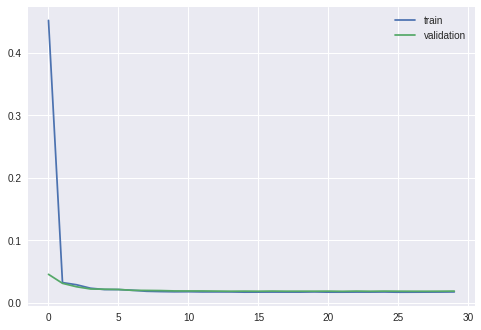

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [0]:
preds = model.predict(testX)
print(testX[0])
for i in preds[0]:
  print(i)

[[-0.036429  -0.28592    0.063387  ... -0.48926    0.30537    0.27273  ]
 [-0.20838   -0.14932   -0.017528  ... -0.54066    0.21199   -0.0094357]
 [-0.11092    0.034125  -0.098563  ...  0.49271   -0.27157   -0.22677  ]
 ...
 [-0.085367  -0.38418    0.42207   ...  0.36012   -0.0089095 -0.40729  ]
 [-0.085367  -0.38418    0.42207   ...  0.36012   -0.0089095 -0.40729  ]
 [-0.085367  -0.38418    0.42207   ...  0.36012   -0.0089095 -0.40729  ]]
0.23079193
0.13190144
0.11187887
0.016699612
0.00084272027
0.044671178
0.1092397
0.044615835
0.075202614
0.021031648
0.027977407
0.04207748
0.037034005
0.1440849
0.09239811
0.040826112
0.02934885
0.040021867
0.02169162
0.04760304
0.03304985
0.033725947
0.06830776
0.004845947
6.902218e-05
0.014947057
0.0019657016
0.015426755
0.011986941
0.02661398
0.026315212
0.05496764
0.04870206
0.07913804
0.20760113
0.21404916
0.027038336
0.0341565
0.0015960038
0.0
0.03528574
0.029011369
0.019720644
0.01649189
0.017130673
0.015316665
0.0
0.03438598
0.01584658
0.009